# Introduction to Deep Learning
## Soham Ghorpade : Project No. 3 
### Keras Sequential Model and Convolution Neural Networks (CNNs)

In [181]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
import shutil
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
from keras import callbacks
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop

In [164]:
img_folder=r'C:/Users/soham/OneDrive/Desktop/3/kagglecatsanddogs_5340/1/Dog'

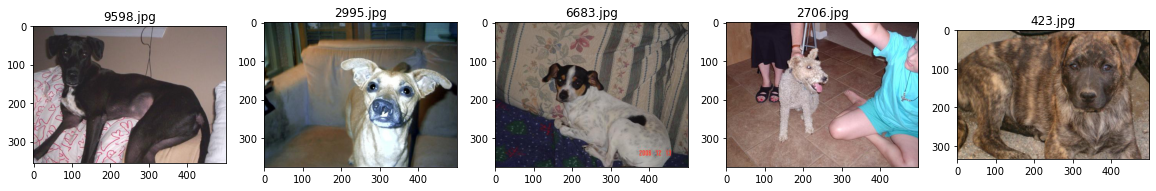

In [165]:
plt.figure(figsize=(20,20))
test_folder=r'C:/Users/soham/OneDrive/Desktop/3/kagglecatsanddogs_5340/1/Dog'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [166]:
directory = 'C:/Users/soham/OneDrive/Desktop/3/kagglecatsanddogs_5340/1'
classes = ['Cat', 'Dog']

for i in classes:
  os.makedirs(directory +'/train/' + i)
  os.makedirs(directory +'/val/' + i)
  source = directory + '/' + i
  allFileNames = os.listdir(source)
  np.random.shuffle(allFileNames)
  test_ratio = 0.25
  train_FileNames, val_FileNames = np.split(np.array(allFileNames),[int(len(allFileNames)* (1 - test_ratio))])
  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  val_FileNames = [source+'/' + name for name in val_FileNames.tolist()]
  for name in train_FileNames:
    shutil.copy(name, directory +'/train/' + i)
  for name in val_FileNames:
    shutil.copy(name, directory +'/val/' + i)

In [179]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape= (150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2), 
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense (512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [168]:
train_dir = os.path.join(directory, 'train')
validation_dir = os.path.join(directory, 'val')

In [169]:
train_cats_dir = os.path.join(train_dir, 'Cat') 
train_dogs_dir = os.path.join(train_dir, 'Dog') 

In [170]:
validation_cats_dir = os.path.join(validation_dir, 'Cat') 
validation_dogs_dir = os.path.join(validation_dir, 'Dog')

In [171]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [172]:
#The validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

In [173]:
# Flow training images in batches of 16 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 16,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

Found 18748 images belonging to 2 classes.


In [174]:
# Flow validation images in batches of 16 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 16,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 6250 images belonging to 2 classes.


In [175]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 2)

Epoch 1/10
100/100 - 62s - loss: 0.6942 - acc: 0.5094 - val_loss: 0.6881 - val_acc: 0.5688 - 62s/epoch - 620ms/step
Epoch 2/10
100/100 - 58s - loss: 0.6875 - acc: 0.5550 - val_loss: 0.6757 - val_acc: 0.5863 - 58s/epoch - 576ms/step
Epoch 3/10
100/100 - 59s - loss: 0.6837 - acc: 0.5562 - val_loss: 0.6721 - val_acc: 0.5925 - 59s/epoch - 594ms/step
Epoch 4/10
100/100 - 58s - loss: 0.6703 - acc: 0.5850 - val_loss: 0.6349 - val_acc: 0.6712 - 58s/epoch - 584ms/step
Epoch 5/10
100/100 - 58s - loss: 0.6570 - acc: 0.6140 - val_loss: 0.6490 - val_acc: 0.6212 - 58s/epoch - 581ms/step
Epoch 6/10
100/100 - 58s - loss: 0.6470 - acc: 0.6319 - val_loss: 0.6204 - val_acc: 0.6637 - 58s/epoch - 578ms/step
Epoch 7/10
100/100 - 57s - loss: 0.6442 - acc: 0.6250 - val_loss: 0.6125 - val_acc: 0.6825 - 57s/epoch - 566ms/step
Epoch 8/10
100/100 - 57s - loss: 0.6360 - acc: 0.6394 - val_loss: 0.6138 - val_acc: 0.6612 - 57s/epoch - 571ms/step
Epoch 9/10
100/100 - 56s - loss: 0.6368 - acc: 0.6350 - val_loss: 0.6602

In [176]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 17, 17, 128)    

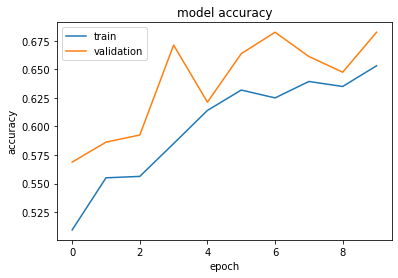

In [177]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Inception v3

In [182]:
InceptionV3

<function keras.applications.inception_v3.InceptionV3(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000, classifier_activation='softmax')>

In [183]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

In [184]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 74, 74, 32)  96          ['conv2d_57[0][0]']              
 rmalization)                                                                                     
                                                                                       

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_14 (BatchN  (None, 16, 16, 96)  288         ['conv2d_67[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_15 (BatchN  (None, 16, 16, 32)  96          ['conv2d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 activatio

 activation_22 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 conv2d_77 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_80 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 16, 16, 48)  144         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 16, 16, 96)  288         ['conv2d_80[0][0]']              
 ormalizat

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_58[0][0]']       
                                                                                                  
 conv2d_91 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 7, 7, 128)   384         ['conv2d_91[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_38[0][0]'] 
          

                                                                                                  
 batch_normalization_48 (BatchN  (None, 7, 7, 160)   480         ['conv2d_101[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 conv2d_102 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_49 (BatchN  (None, 7, 7, 160)   480         ['conv2d_102[0][0]']             
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_112 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_59 (BatchN  (None, 7, 7, 160)   480         ['conv2d_112[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 conv2d_108 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_11

                                                                                                  
 activation_65 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_118 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_123 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 7, 7, 192)   576         ['conv2d_118[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_131 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_127[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_78 (BatchN  (None, 7, 7, 192)   576         ['conv2d_131[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 activatio

                                                                                                  
 activation_78 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 batch_normalization_88 (BatchN  (None, 3, 3, 192)   576         ['conv2d_141[0][0]']             
 ormalizat

                                                                                                  
 activation_92 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_96[0][0]'] 
                                                                                                  
 batch_normalization_97 (BatchN  (None, 3, 3, 192)   576         ['conv2d_150[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_89[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
          

In [185]:
local_weights_file = 'inception_v3_weights.h5'

In [187]:
pre_trained_model.load_weights('C:/Users/soham/OneDrive/Desktop/3/inception_v3_weights.h5')

In [188]:
for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 74, 74, 32)  96          ['conv2d_57[0][0]']              
 rmalization)                                                                                     
                                                                                       

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_14 (BatchN  (None, 16, 16, 96)  288         ['conv2d_67[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_15 (BatchN  (None, 16, 16, 32)  96          ['conv2d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 activatio

 activation_22 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 conv2d_77 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_80 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 16, 16, 48)  144         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 16, 16, 96)  288         ['conv2d_80[0][0]']              
 ormalizat

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_58[0][0]']       
                                                                                                  
 conv2d_91 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 7, 7, 128)   384         ['conv2d_91[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_38[0][0]'] 
          

                                                                                                  
 batch_normalization_48 (BatchN  (None, 7, 7, 160)   480         ['conv2d_101[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 conv2d_102 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_49 (BatchN  (None, 7, 7, 160)   480         ['conv2d_102[0][0]']             
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_112 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_59 (BatchN  (None, 7, 7, 160)   480         ['conv2d_112[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 conv2d_108 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_11

                                                                                                  
 activation_65 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_118 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_123 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 7, 7, 192)   576         ['conv2d_118[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_131 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_127[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_78 (BatchN  (None, 7, 7, 192)   576         ['conv2d_131[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 activatio

                                                                                                  
 activation_78 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 batch_normalization_88 (BatchN  (None, 3, 3, 192)   576         ['conv2d_141[0][0]']             
 ormalizat

                                                                                                  
 activation_92 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_96[0][0]'] 
                                                                                                  
 batch_normalization_97 (BatchN  (None, 3, 3, 192)   576         ['conv2d_150[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_89[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
          

In [189]:
last_layer = pre_trained_model.get_layer('mixed10')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


In [194]:
from tensorflow.keras import Model
from keras import layers
x = layers.Flatten()(last_output)
x = layers.Dense(1000, activation='relu')(x)

In [195]:
x = layers.Dense(200, activation='relu')(x)
x = layers.Dense(12, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)           

model = Model(pre_trained_model.input, x) 

In [196]:
model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

In [197]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_57 (Conv2D)             (None, 74, 74, 32)   864         ['input_3[0][0]']                
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 74, 74, 32)  96          ['conv2d_57[0][0]']              
 rmalization)                                                                                     
                                                                                              

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_14 (BatchN  (None, 16, 16, 96)  288         ['conv2d_67[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_15 (BatchN  (None, 16, 16, 32)  96          ['conv2d_68[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 activatio

 activation_22 (Activation)     (None, 16, 16, 64)   0           ['batch_normalization_26[0][0]'] 
                                                                                                  
 conv2d_77 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_80 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_24 (BatchN  (None, 16, 16, 48)  144         ['conv2d_77[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 16, 16, 96)  288         ['conv2d_80[0][0]']              
 ormalizat

 mixed3 (Concatenate)           (None, 7, 7, 768)    0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_58[0][0]']       
                                                                                                  
 conv2d_91 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_38 (BatchN  (None, 7, 7, 128)   384         ['conv2d_91[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_38[0][0]'] 
          

                                                                                                  
 batch_normalization_48 (BatchN  (None, 7, 7, 160)   480         ['conv2d_101[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_48[0][0]'] 
                                                                                                  
 conv2d_102 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_49 (BatchN  (None, 7, 7, 160)   480         ['conv2d_102[0][0]']             
 ormalization)                                                                                    
          

                                                                                                  
 conv2d_112 (Conv2D)            (None, 7, 7, 160)    179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_59 (BatchN  (None, 7, 7, 160)   480         ['conv2d_112[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_59[0][0]'] 
                                                                                                  
 conv2d_108 (Conv2D)            (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_11

                                                                                                  
 activation_65 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_69[0][0]'] 
                                                                                                  
 conv2d_118 (Conv2D)            (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_123 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_65 (BatchN  (None, 7, 7, 192)   576         ['conv2d_118[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_nor

 conv2d_131 (Conv2D)            (None, 7, 7, 192)    258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_74 (BatchN  (None, 7, 7, 192)   576         ['conv2d_127[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_78 (BatchN  (None, 7, 7, 192)   576         ['conv2d_131[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_70 (Activation)     (None, 7, 7, 192)    0           ['batch_normalization_74[0][0]'] 
                                                                                                  
 activatio

                                                                                                  
 activation_78 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_83[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_86[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_87[0][0]'] 
                                                                                                  
 batch_normalization_88 (BatchN  (None, 3, 3, 192)   576         ['conv2d_141[0][0]']             
 ormalizat

                                                                                                  
 activation_92 (Activation)     (None, 3, 3, 384)    0           ['batch_normalization_96[0][0]'] 
                                                                                                  
 batch_normalization_97 (BatchN  (None, 3, 3, 192)   576         ['conv2d_150[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 3, 3, 320)    0           ['batch_normalization_89[0][0]'] 
                                                                                                  
 mixed9_1 (Concatenate)         (None, 3, 3, 768)    0           ['activation_87[0][0]',          
                                                                  'activation_88[0][0]']          
          

In [198]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 10,
            validation_steps = 50,
            verbose = 2)

Epoch 1/10
100/100 - 68s - loss: 1.0364 - acc: 0.7456 - val_loss: 0.3807 - val_acc: 0.9575 - 68s/epoch - 684ms/step
Epoch 2/10
100/100 - 69s - loss: 0.3876 - acc: 0.8831 - val_loss: 0.0857 - val_acc: 0.9712 - 69s/epoch - 690ms/step
Epoch 3/10
100/100 - 59s - loss: 0.1879 - acc: 0.9219 - val_loss: 0.1194 - val_acc: 0.9600 - 59s/epoch - 595ms/step
Epoch 4/10
100/100 - 59s - loss: 0.1834 - acc: 0.9250 - val_loss: 0.1477 - val_acc: 0.9413 - 59s/epoch - 589ms/step
Epoch 5/10
100/100 - 59s - loss: 0.2173 - acc: 0.9112 - val_loss: 0.1049 - val_acc: 0.9613 - 59s/epoch - 589ms/step
Epoch 6/10
100/100 - 62s - loss: 0.1821 - acc: 0.9198 - val_loss: 0.1837 - val_acc: 0.9413 - 62s/epoch - 616ms/step
Epoch 7/10
100/100 - 62s - loss: 0.1648 - acc: 0.9325 - val_loss: 0.0975 - val_acc: 0.9625 - 62s/epoch - 617ms/step
Epoch 8/10
100/100 - 62s - loss: 0.1687 - acc: 0.9337 - val_loss: 0.0780 - val_acc: 0.9787 - 62s/epoch - 619ms/step
Epoch 9/10
100/100 - 63s - loss: 0.1759 - acc: 0.9325 - val_loss: 0.0955

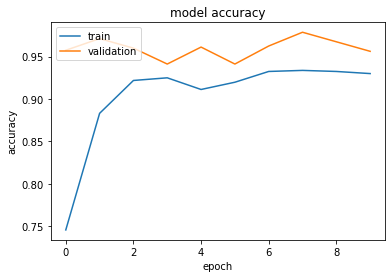

In [199]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()